In [462]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import safeopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

In [463]:
#genrate an x,y point and a target value
grid_size = (10,10)

agent_pos = np.array([5.,7.])
target_pos = np.array([7.,7.])
agent_trajectory = [agent_pos.tolist()]  # Convert to list to ensure compatibility

def plot_env(agent_trajectory, target_pos):
    fig, ax = plt.subplots()
    ax.set_xlim(0, grid_size[0])
    ax.set_ylim(0, grid_size[1])
    
    # Extract the x and y coordinates of the agent's trajectory
    x_coords, y_coords = zip(*agent_trajectory)
    
    ax.plot(x_coords, y_coords, 'g--', label='Trajectory')  # Plot the trajectory as a dashed green line
    ax.plot(agent_trajectory[-1][0], agent_trajectory[-1][1], 'go', label='Agent')  # Plot the current position of the agent
    ax.plot(target_pos[0], target_pos[1], 'ro', label='Target')  # Plot the target position
    
    plt.legend()


In [464]:
def calculate_reward(agent_pos, target_pos):

    reward = -np.linalg.norm(agent_pos - target_pos)
    
    return reward

In [465]:
#create gp 

np.random.seed(np.random.randint(0, 1000))

bounds = [(-0.5, 0.5), (-0.5, 0.5)]
kernel = GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.0,ARD=True)

x0 = np.zeros((1, len(bounds)))


noise_var = 0

reward = calculate_reward(agent_pos, target_pos)
reward = np.asarray([[reward]])
print("Initial reward: ",reward)

gp = GPy.models.GPRegression(x0,reward, kernel, noise_var=noise_var)

parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)

opt = safeopt.SafeOpt(gp, parameter_set, -2.1,threshold=0.3,beta=2,lipschitz=None)




Initial reward:  [[-2.]]


In [466]:
total_rewards = []
total_actions = []

Agent has reached the target
Final agent position:  [7.17317317 7.07207207]
Final reward:  -0.18757220337680156
Total rewards:  [-2.0048194639080714, -1.9892899718013024, -1.9763594276289338, -1.589350352518776, -1.0478498846553173, -1.743970419535722, -1.0478498846553168, -0.4397038612882275, -0.6939951562688106, -0.41360242124382574, -0.6833710742006025]
Total actions:  [array([-0.0045045 , -0.03553554]), array([0.04454454, 0.37587588]), array([0.07157157, 0.24274274]), array([0.498999  , 0.18868869]), array([ 0.5       , -0.21771772]), array([-0.5,  0.5]), array([ 0.5, -0.5]), array([ 0.49199199, -0.36586587]), array([0.48698699, 0.5       ]), array([ 0.26176176, -0.46996997]), array([ 0.32182182, -0.33583584]), array([-0.5       ,  0.18968969])]


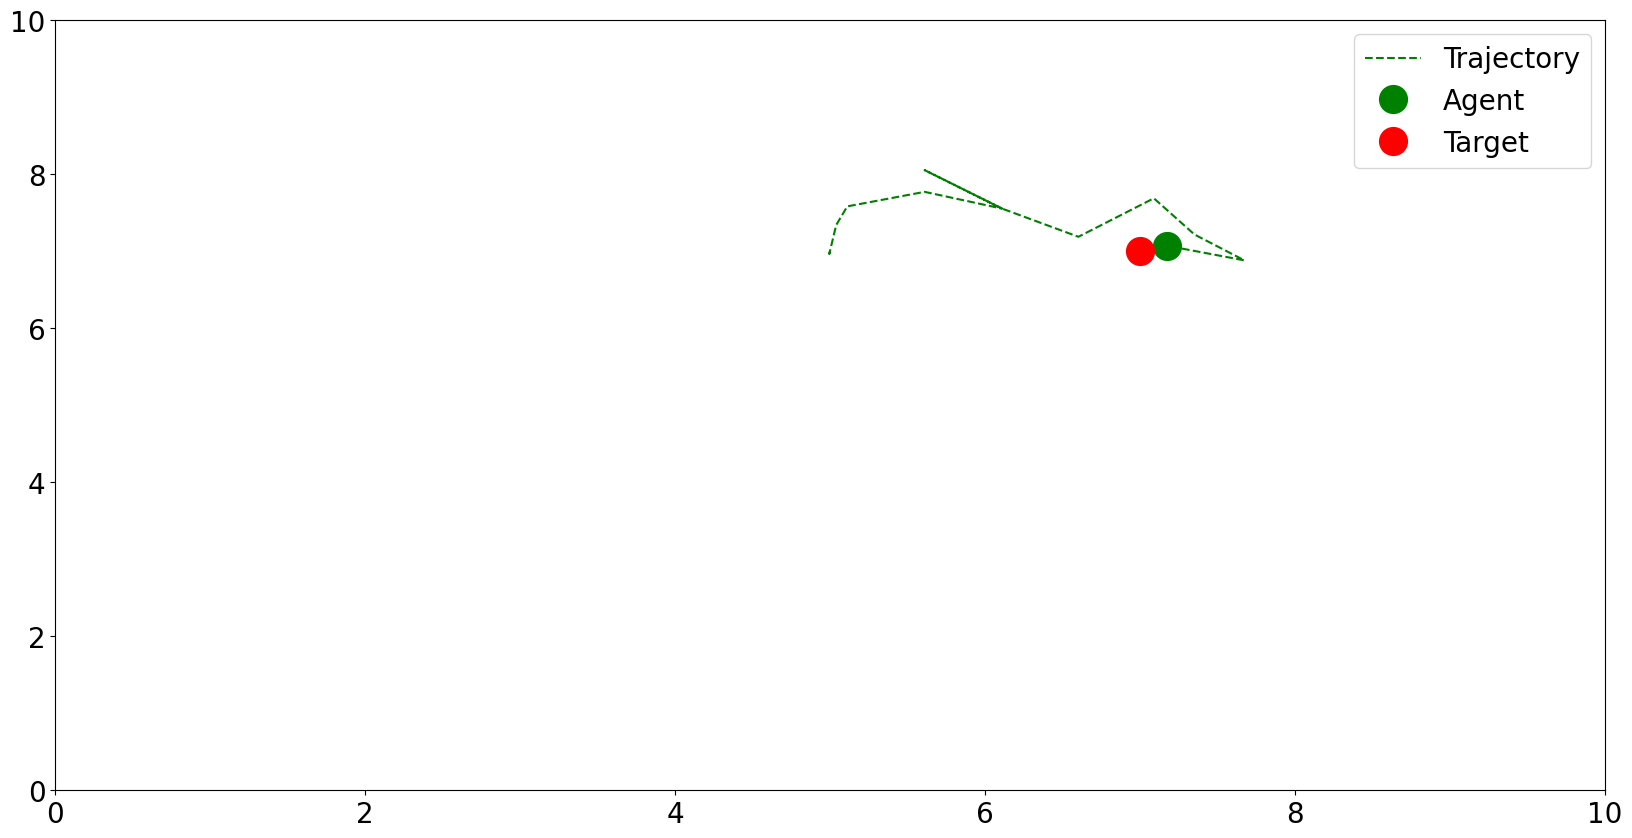

In [467]:

for _ in range(20):


    action = opt.optimize()

    total_actions.append(action) #append the action to the list of actions

    agent_pos = agent_pos + action

    agent_trajectory.append(agent_pos.tolist())  # Append the new position as a list

    reward = calculate_reward(agent_pos, target_pos)

    if np.absolute(reward) < 0.2:
        print("Agent has reached the target")
        break

    total_rewards.append(reward) #append the reward to the list of rewards

    opt.add_new_data_point(action, reward)




print("Final agent position: ",agent_pos)
print("Final reward: ",calculate_reward(agent_pos, target_pos))


print("Total rewards: ",total_rewards)
print("Total actions: ",total_actions)

plot_env(agent_trajectory, target_pos)


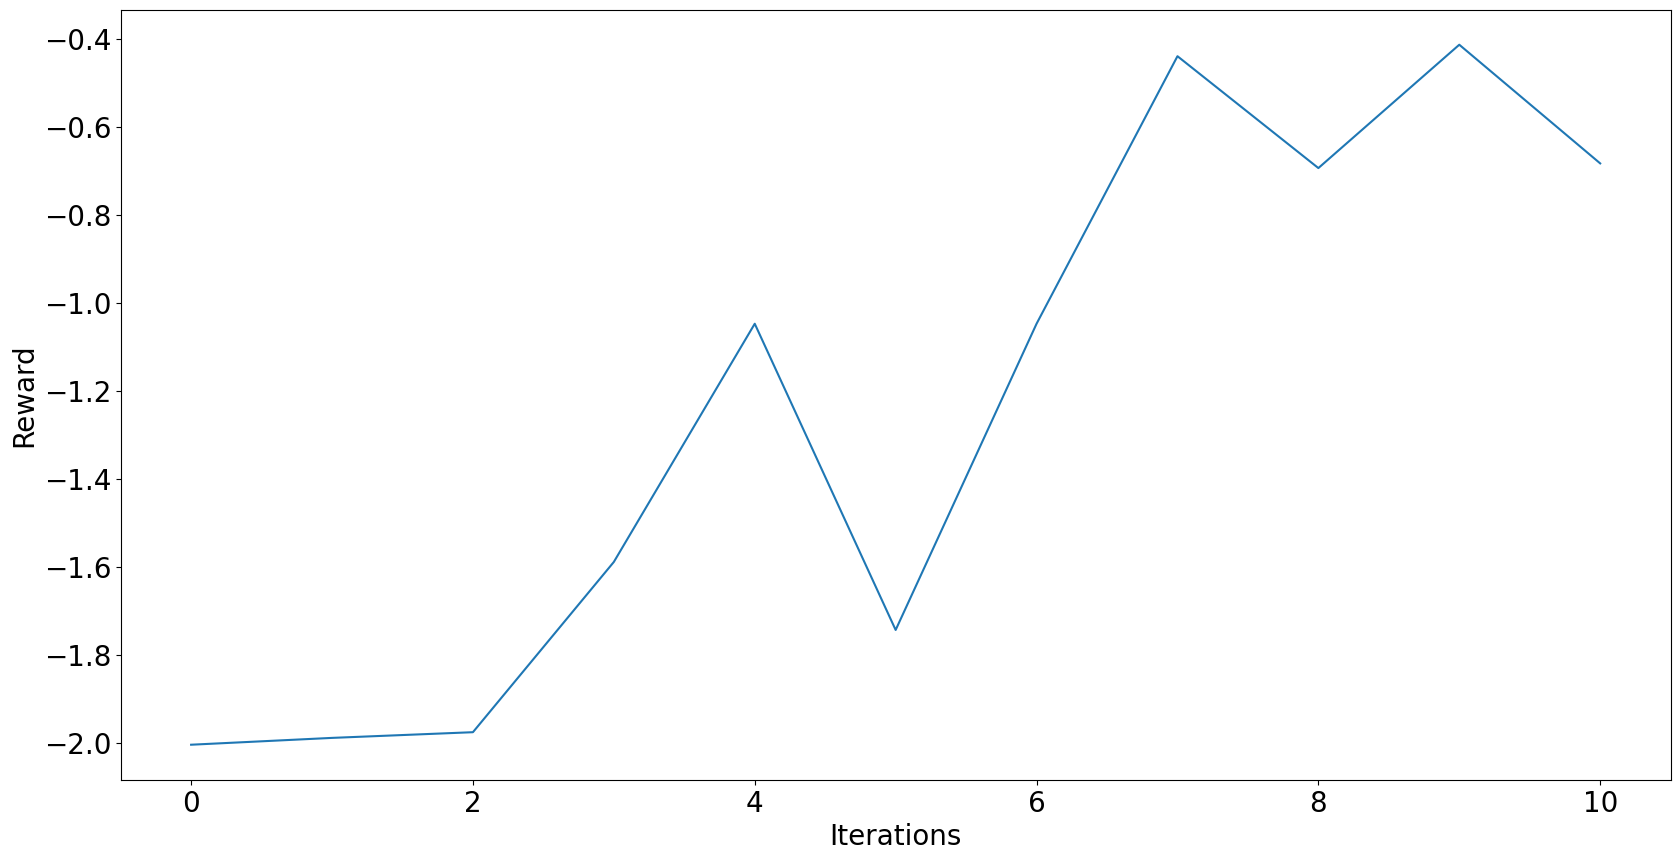

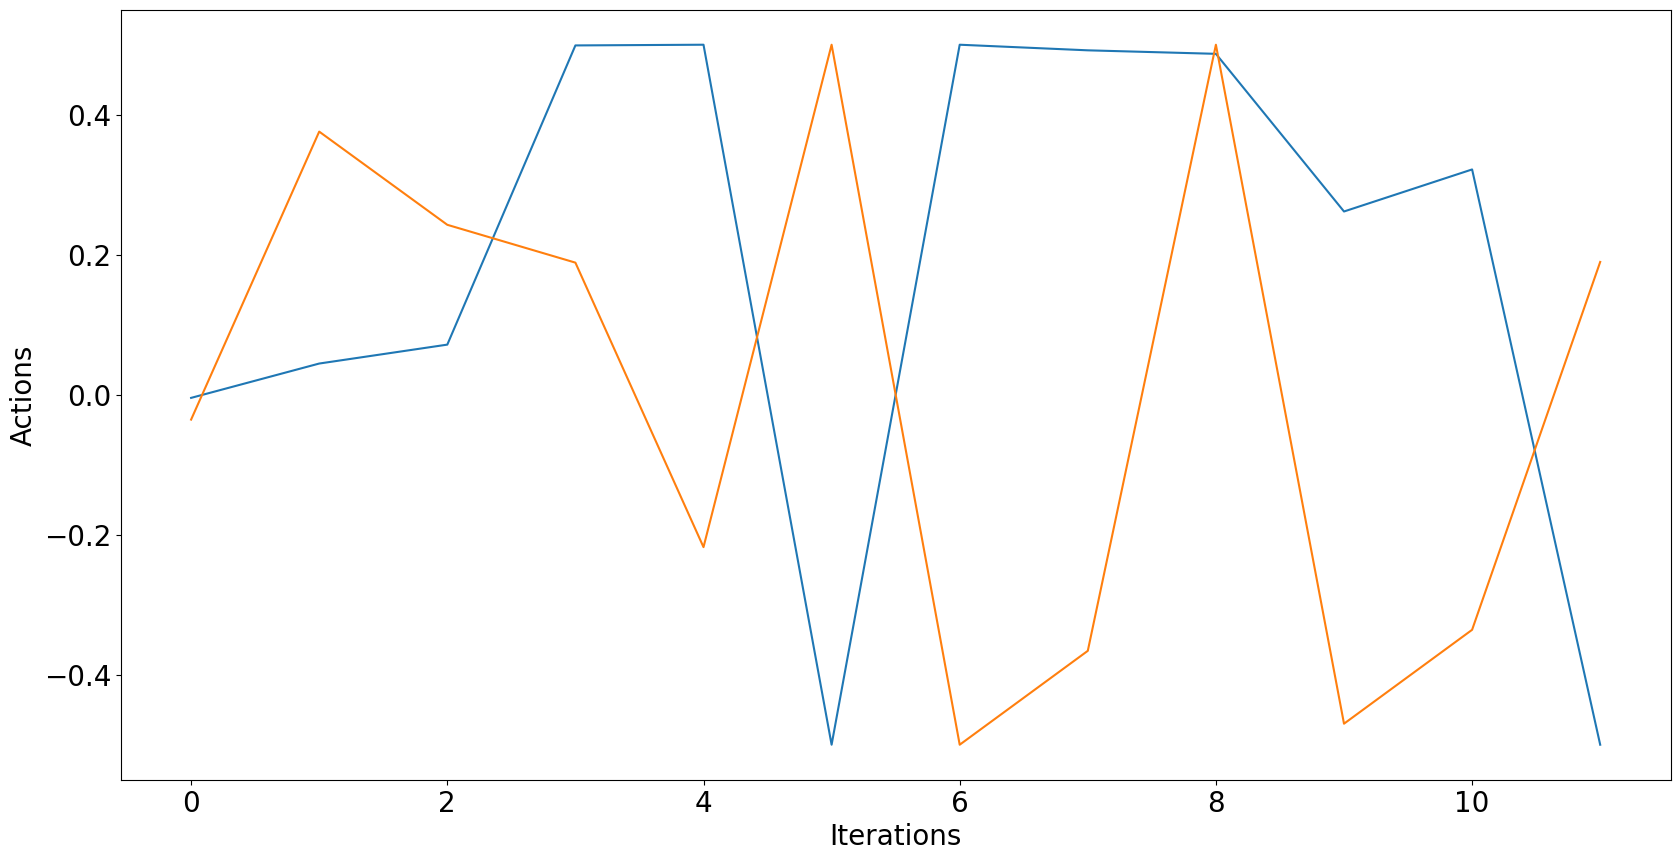

In [468]:
#plot the rewards
plt.plot(total_rewards)
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.show()


